In [14]:
!/bin/bash ./setup.sh

SageMaker instance route table setup is ok. We are good to go.
SageMaker instance routing for Docker is ok. We are good to go!


In [63]:
import sys
!{sys.executable} -m pip install sagemaker -U
!{sys.executable} -m pip install tensorflow -U

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 96.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 28.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 45.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 19.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 49.7 MB/s 

In [16]:
import os
import sagemaker
from sagemaker import get_execution_role
import pandas as pd
import numpy as np

sagemaker_session = sagemaker.Session()

role = get_execution_role()
region = sagemaker_session.boto_session.region_name

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [29]:
# Specify your bucket name
bucket_name = 'tellisa-collage-gan'

training_folder = r'collage_gan_subset/train_csv'
test_folder = r'collage_gan_subset/test'
model_folder = r'collage_gan_subset/model/'

training_data_uri = r's3://' + bucket_name + r'/' + training_folder
testing_data_uri = r's3://' + bucket_name + r'/' + test_folder
model_data_uri = r's3://' + bucket_name + r'/' + model_folder

In [43]:
!pygmentize 'GAN_Script.py'
#pygmentize 'GAN_Test.py'

import argparse
import os 
import pandas as pd
import json

#import keras
#from keras.models import Sequential
#from keras.layers import Reshape
#from keras.layers import Flatten
#from keras.layers import Conv2D, Dense, Conv2DTranspose
#from keras.layers import Dropout
#from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf
import boto3
from boto3 import Session

session = Session()
credentials = session.get_credentials()

#aws access credentials
current_credentials = credentials.get_frozen_credentials()





def model(args, x_train,client):
    
    adam = Adam(learning_rate=0.0002)
    # Function for Generator
    def build_generator():
        model = tf.keras.models.Sequential()

        # Layer 1
        model.add(tf.keras.layers.Dense(256 * 16* 16, input_dim=args.latent_dim)) # 128/2/2/2 because 3 conv2d layers?
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras

In [19]:
from sagemaker.tensorflow import TensorFlow

In [54]:
instance_type = 'ml.p3.2xlarge'
#instance_type='ml.m5.xlarge'
#instance_type='local'

In [49]:
hyperparameters = dict(
    batch_size=32,
    epochs=4
    
)

In [50]:
estimator = TensorFlow(entry_point='GAN_Script.py',
                       role=role,
                       instance_count=1,
                       instance_type=instance_type,
                       framework_version='2.1.0',
                       py_version='py3',
                       output_path=model_data_uri,
                       base_job_name='tf-collage-gan',
                       hyperparameters=hyperparameters,
                       distribution={'parameter_server': {'enabled': False}})

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [51]:
estimator.fit({'training':training_data_uri}) #,'testing':testing_data_uri

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: tf-collage-gan-2023-01-28-12-41-18-409


2023-01-28 12:41:18 Starting - Starting the training job...
2023-01-28 12:41:34 Starting - Preparing the instances for training......
2023-01-28 12:42:41 Downloading - Downloading input data......
2023-01-28 12:43:31 Training - Downloading the training image...
2023-01-28 12:44:16 Training - Training image download completed. Training in progress.....2023-01-28 12:44:45,255 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
2023-01-28 12:44:45,575 sagemaker-containers INFO     Invoking user script
Training Env:
{
    "additional_framework_parameters": {
        "sagemaker_parameter_server_enabled": false
    },
    "channel_input_dirs": {
        "training": "/opt/ml/input/data/training"
    },
    "current_host": "algo-1",
    "framework_module": "sagemaker_tensorflow_container.training:main",
    "hosts": [
        "algo-1"
    ],
    "hyperparameters": {
        "batch_size": 32,
        "epochs": 4,
        "model_dir": "s3://tellisa-collage-ga

In [55]:
predictor = estimator.deploy(initial_instance_count=1, instance_type=instance_type)

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.tensorflow.model:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating model with name: tf-collage-gan-2023-01-28-13-00-55-739
INFO:sagemaker:Creating endpoint-config with name tf-collage-gan-2023-01-28-13-00-55-739
INFO:sagemaker:Creating endpoint with name tf-collage-gan-2023-01-28-13-00-55-739


------!

In [56]:
import numpy as np
noise = np.random.normal(0, 1, (1, 100))

In [57]:
result = predictor.predict(noise)

In [58]:
img=np.array(result['predictions']).reshape(128,128,3)

INFO:matplotlib.font_manager:generated new fontManager


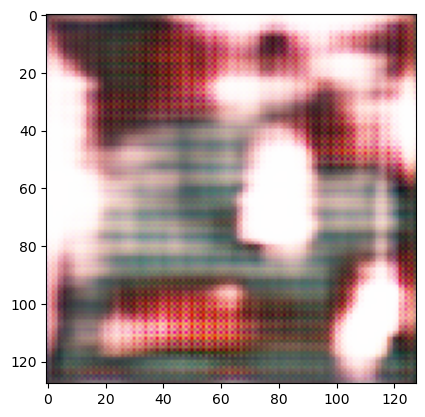

In [59]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [60]:
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: tf-collage-gan-2023-01-28-13-00-55-739
INFO:sagemaker:Deleting endpoint with name: tf-collage-gan-2023-01-28-13-00-55-739


In [64]:
import boto3
import tensorflow as tf


s3 = boto3.resource('s3')


s3.meta.client.download_file("tellisa-collage-gan",'my_generator.h5', '/tmp/my_generator.h5')
gen = tf.keras.models.load_model('/tmp/my_generator.h5', compile=False)

2023-01-28 13:06:48.939442: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
2023-01-28 13:07:03.828984: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-28 13:07:03.829076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-45-236.us-east-2.compute.internal): /proc/driver/nvidia/version does not exist
2023-01-28 13:07:03.830102: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep

In [65]:
result = gen.predict(noise)

1/1 [==============================] - 0s 435ms/step


In [66]:
import matplotlib.pyplot as plt

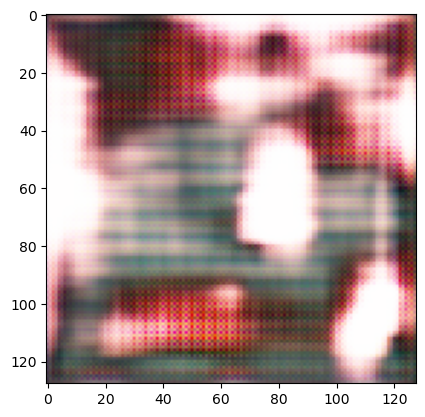

In [67]:
plt.imshow(result.reshape(128,128,3))